In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial import distance

In [2]:
df = pd.read_csv('for_matrix_short_name.tsv',sep='\t',names=["gene_cluster","crass"])

In [3]:
df

,gene_cluster,crass
0,GC_00000433,c102_node_469
1,GC_00000433,c49_node_189
2,GC_00000433,c68_node_212
3,GC_00000433,p114_node_209
4,GC_00000433,p116_node_212
...,...,...
13940,GC_00000663,c46_node_390
13941,GC_00000663,p17_node_160
13942,GC_00000663,p72_node_404
13943,GC_00001174,p18_node_220


In [4]:
value_counts = df["gene_cluster"].value_counts()

# Filter the DataFrame to keep rows where the first column value appears more than once
filtered_df = df[df["gene_cluster"].isin(value_counts[value_counts > 1].index)]

In [10]:
filtered_df

,gene_cluster,crass
0,GC_00000433,c102_node_469
1,GC_00000433,c49_node_189
2,GC_00000433,c68_node_212
3,GC_00000433,p114_node_209
4,GC_00000433,p116_node_212
...,...,...
13940,GC_00000663,c46_node_390
13941,GC_00000663,p17_node_160
13942,GC_00000663,p72_node_404
13943,GC_00001174,p18_node_220


In [11]:
pivot_df = filtered_df.pivot_table(index='gene_cluster', columns='crass', aggfunc='size', fill_value=0)
pivot_df = pivot_df.applymap(lambda x: 1 if x > 1 else x)


In [12]:
pivot_df

crass,c102_node_357,c102_node_469,c103_node_93,c105_node_57,c107_node_114,c114_node_413,c114_node_486,c116_node_95,c123_node_104,c124_node_185,...,p72_node_83,p77_node_198,p77_node_201,p87_node_235,p87_node_250,p87_node_259,p88_node_100,p88_node_114,p94_node_100,p95ii_node_259
gene_cluster,,,,,,,,,,,,,,,,,,,,,
GC_00000001,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GC_00000002,0,1,0,1,1,1,1,1,0,1,...,1,0,1,1,1,1,0,0,1,1
GC_00000003,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
GC_00000004,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
GC_00000005,0,1,0,1,0,0,1,1,1,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GC_00001214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GC_00001215,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
GC_00001216,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
binary_df = (pivot_df > 0).astype(int)

In [14]:
binary_df

crass,c102_node_357,c102_node_469,c103_node_93,c105_node_57,c107_node_114,c114_node_413,c114_node_486,c116_node_95,c123_node_104,c124_node_185,...,p72_node_83,p77_node_198,p77_node_201,p87_node_235,p87_node_250,p87_node_259,p88_node_100,p88_node_114,p94_node_100,p95ii_node_259
gene_cluster,,,,,,,,,,,,,,,,,,,,,
GC_00000001,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GC_00000002,0,1,0,1,1,1,1,1,0,1,...,1,0,1,1,1,1,0,0,1,1
GC_00000003,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
GC_00000004,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
GC_00000005,0,1,0,1,0,0,1,1,1,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GC_00001214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GC_00001215,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
GC_00001216,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
def calculate_shared_percentage(col1, col2):
    shared = sum((col1 == 1) & (col2 == 1))
    total = sum((col1 == 1) | (col2 == 1))
    return (shared / total) * 100 if total > 0 else 0

# Get the list of crass columns
crass_columns = binary_df.columns

# Create an empty dataframe to store the results
result_df = pd.DataFrame(index=crass_columns, columns=crass_columns)

# Calculate the percentage for each pair of columns
for i, col1 in enumerate(crass_columns):
    for j, col2 in enumerate(crass_columns):
        if i <= j:  # We only need to calculate the upper triangle
            percentage = calculate_shared_percentage(binary_df[col1], binary_df[col2])
            result_df.loc[col1, col2] = percentage
            result_df.loc[col2, col1] = percentage  # The matrix is symmetric

# Fill diagonal with 100% (each column fully shares with itself)
np.fill_diagonal(result_df.values, 100)

#Round the percentages to two decimal places
result_df = result_df.round(2)

In [16]:
result_df

crass,c102_node_357,c102_node_469,c103_node_93,c105_node_57,c107_node_114,c114_node_413,c114_node_486,c116_node_95,c123_node_104,c124_node_185,...,p72_node_83,p77_node_198,p77_node_201,p87_node_235,p87_node_250,p87_node_259,p88_node_100,p88_node_114,p94_node_100,p95ii_node_259
crass,,,,,,,,,,,,,,,,,,,,,
c102_node_357,100,6.569343,22.033898,9.090909,31.623932,32.5,6.626506,9.558824,9.868421,7.792208,...,5.128205,16.911765,31.967213,8.843537,29.133858,8.609272,16.911765,22.131148,32.478632,5.031447
c102_node_469,6.569343,100,7.575758,9.210526,7.801418,7.534247,9.375,12.21374,8.552632,9.333333,...,7.488987,5.369128,7.432432,41.071429,7.284768,10.204082,5.369128,6.521739,7.746479,5.095541
c103_node_93,22.033898,7.575758,100,10.067114,22.95082,22.047244,8.125,9.848485,9.395973,8.0,...,5.676856,28.099174,21.705426,9.090909,18.518519,9.589041,28.099174,88.311688,22.764228,3.821656
c105_node_57,9.090909,9.210526,10.067114,100,8.75,9.146341,41.726619,38.52459,23.84106,25.675676,...,7.692308,8.484848,9.036145,11.111111,8.87574,73.584906,8.484848,9.74026,9.375,18.35443
c107_node_114,31.623932,7.801418,22.95082,8.75,100,39.830508,7.017544,8.391608,7.453416,7.5,...,5.439331,16.197183,39.166667,8.496732,28.787879,8.280255,16.197183,22.047244,91.666667,3.592814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p87_node_259,8.609272,10.204082,9.589041,73.584906,8.280255,8.695652,47.328244,41.025641,25.342466,27.272727,...,7.81893,8.024691,8.588957,12.820513,7.784431,100,8.024691,8.552632,8.227848,18.831169
p88_node_100,16.911765,5.369128,28.099174,8.484848,16.197183,16.438356,6.818182,8.108108,7.878788,7.272727,...,4.471545,93.181818,16.216216,6.875,15.89404,8.024691,100,28.0,16.901408,3.488372
p88_node_114,22.131148,6.521739,88.311688,9.74026,22.047244,24.031008,7.228916,9.489051,9.090909,8.441558,...,6.008584,28.0,23.664122,10.273973,18.705036,8.552632,28.0,100,22.834646,3.703704


/home/iduru/.local/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


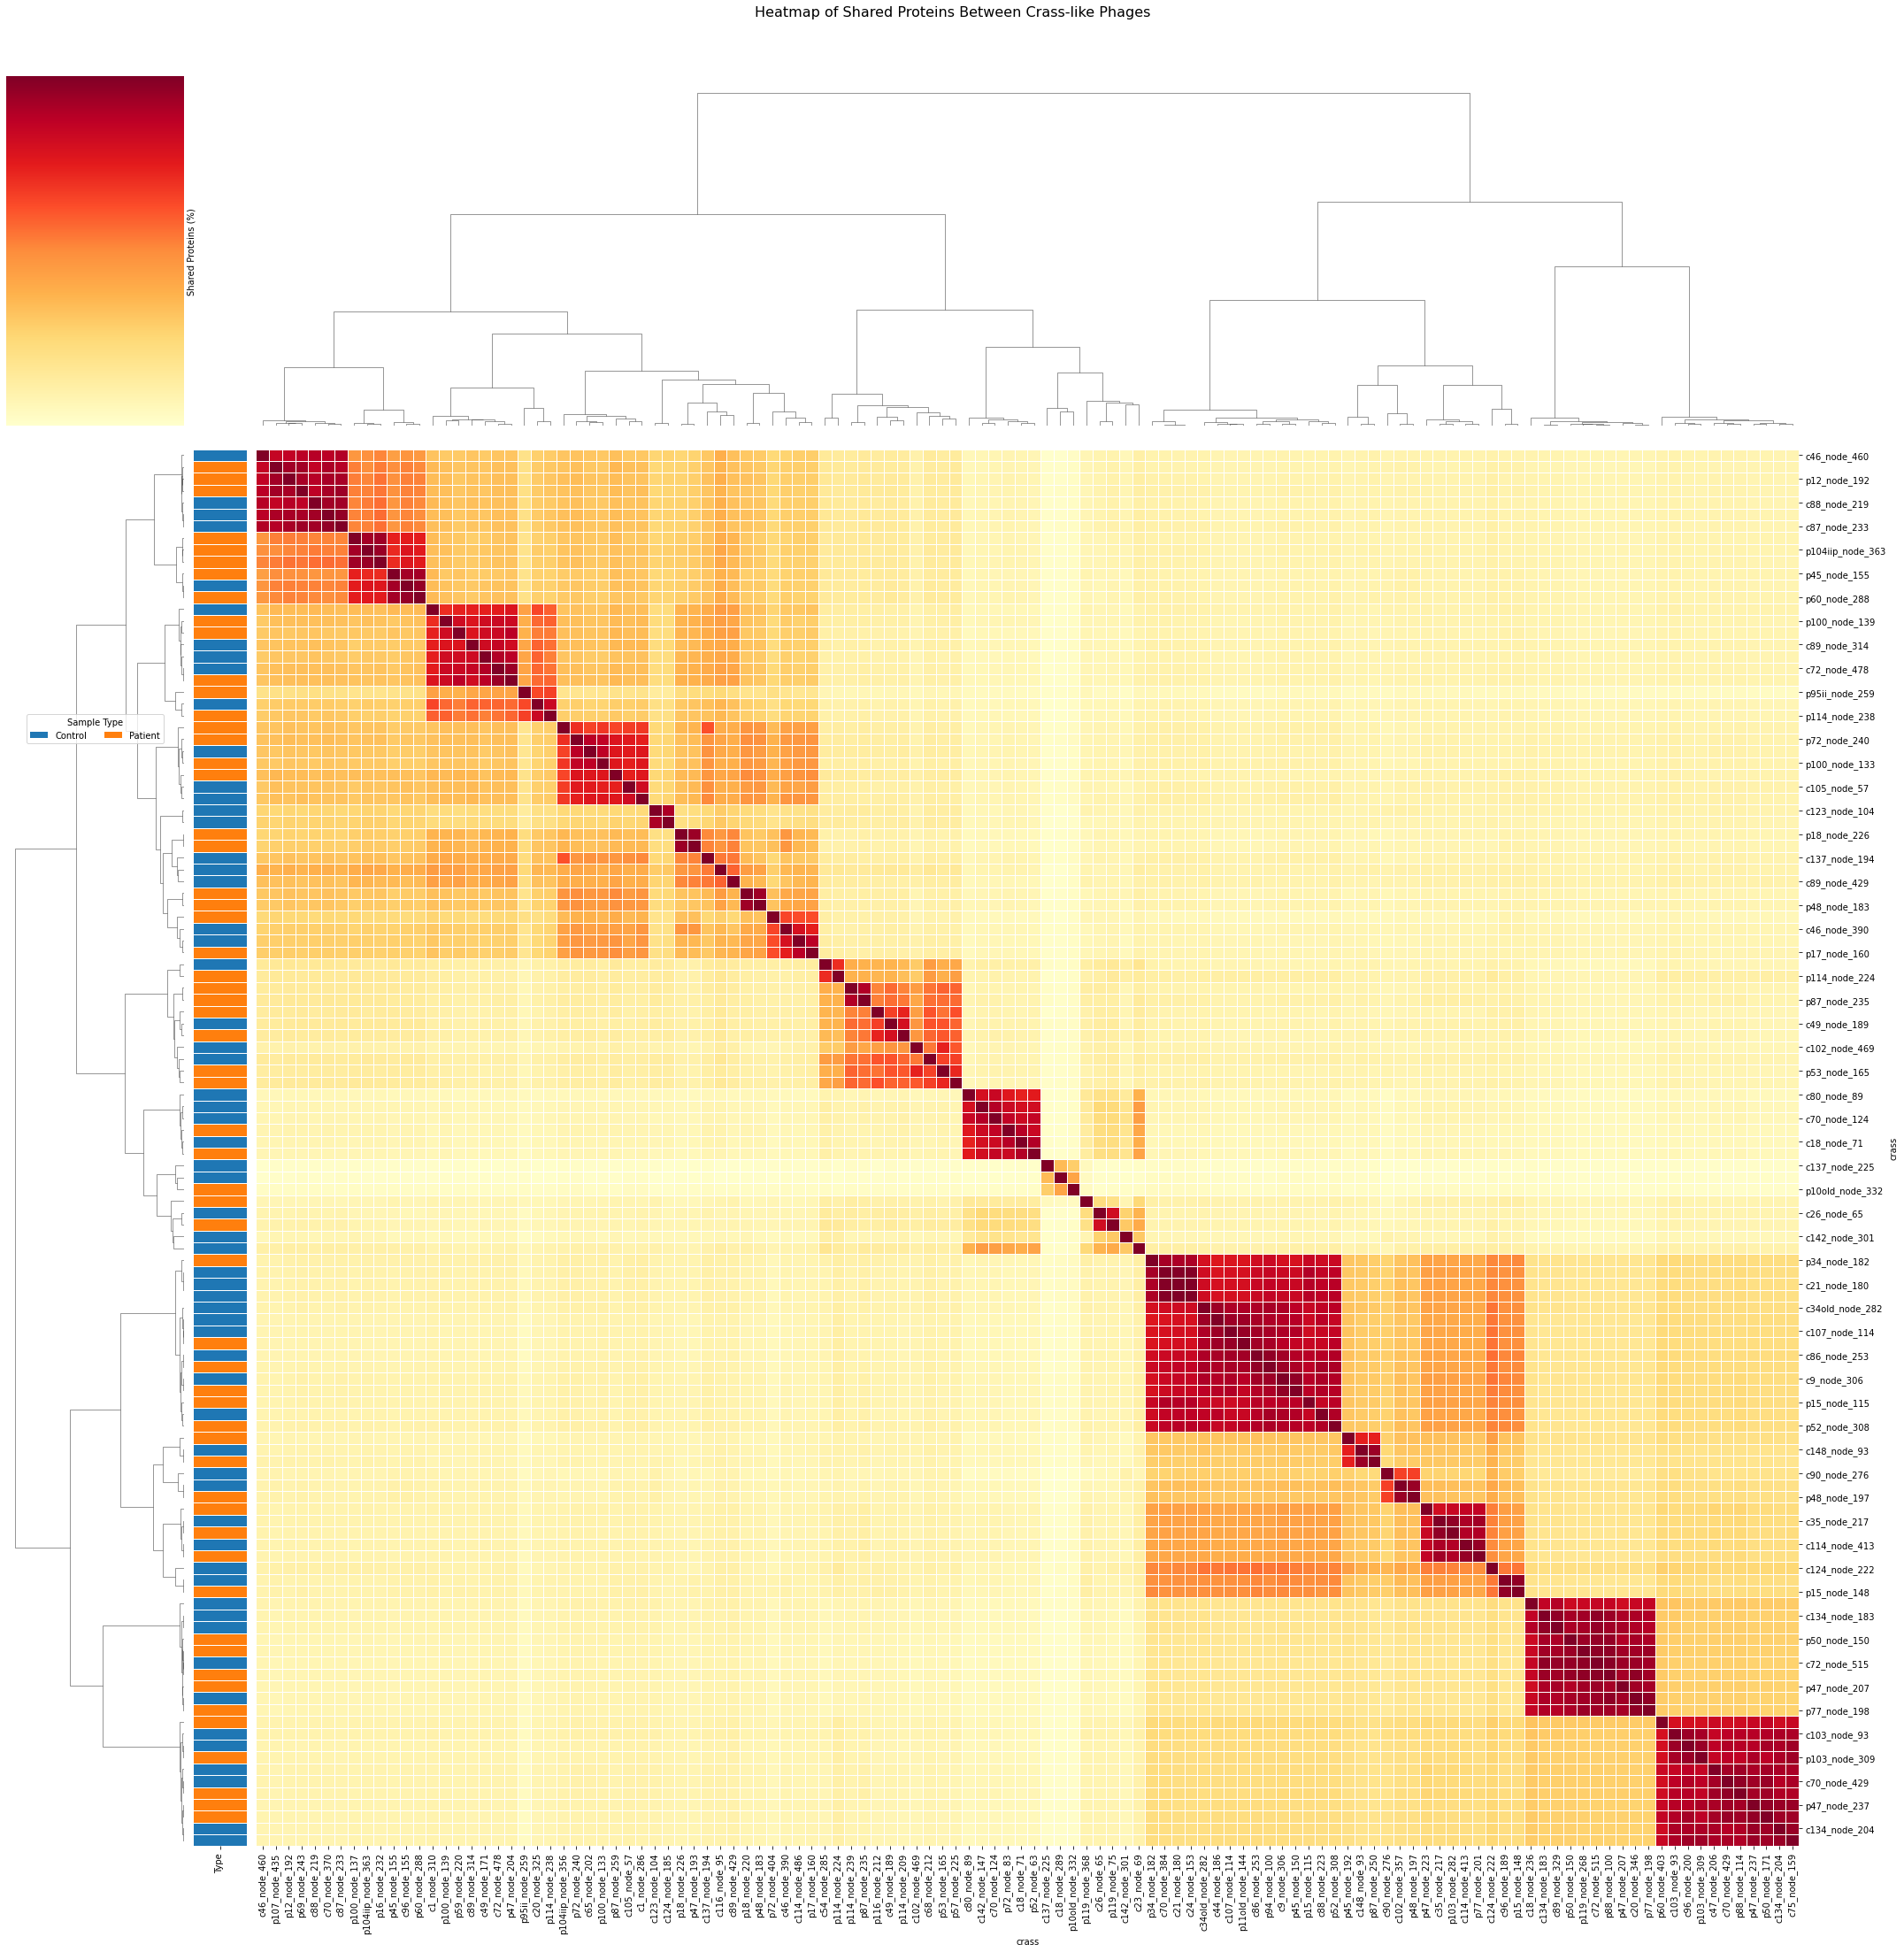

In [20]:
result_df = result_df.astype(float)
# Create a new dataframe for the sample type
sample_type = pd.DataFrame(index=result_df.index)
sample_type['Type'] = ['Control' if name.startswith('c') else 'Patient' for name in result_df.index]

# Create a color palette for the sample types
colors = {'Control': '#1f77b4', 'Patient': '#f was initially converted into a binary count matrix where the percentage of shared ortholof7f0e'}

# Create the clustered heatmap with the additional color bar, with ward method
g = sns.clustermap(result_df, 
                   cmap="YlOrRd",
                   annot=False,  
                   linewidths=0.5,
                   row_cluster=True,
                   col_cluster=True,
                   cbar_kws={'label': 'Shared Proteins (%)'},
                   dendrogram_ratio=(.1, .2),
                   figsize=(30, 30),
                   row_colors=sample_type['Type'].map(colors),
                   method='ward')

# Customize the plot
plt.suptitle("Heatmap of Shared Proteins Between Crass-like Phages", fontsize=16, y=1.02)
plt.xticks([])
plt.yticks([])

# Add a legend for the sample types
for label in colors:
    g.ax_row_dendrogram.bar(0, 0, color=colors[label], label=label, linewidth=0)
g.ax_row_dendrogram.legend(title='Sample Type', loc="center", ncol=2, bbox_to_anchor=(0.5, 0.8))

plt.tight_layout()
plt.show()
g.savefig("heatmap_huge.pdf")

/home/iduru/.local/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


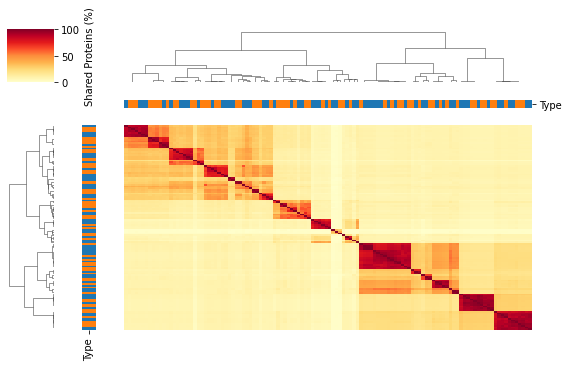

In [21]:
# Create a new dataframe for the sample type
sample_type = pd.DataFrame(index=result_df.index)
sample_type['Type'] = ['Control' if name.startswith('c') else 'Patient' for name in result_df.index]

# Create a color palette for the sample types
colors = {'Control': '#1f77b4', 'Patient': '#ff7f0e'}

# Create the clustered heatmap with the additional color bar, with ward method
g = sns.clustermap(result_df, 
                   cmap="YlOrRd",
                   annot=False,
                   linewidths=0.0,
                   row_cluster=True,
                   col_cluster=True,
                   cbar_kws={'label': 'Shared Proteins (%)'},
                   dendrogram_ratio=(.1, .2),
                   figsize=(8, 5),
                   xticklabels=False,  
                   yticklabels=False, 
                   row_colors=sample_type['Type'].map(colors),
                   col_colors=sample_type['Type'].map(colors),
                   method='ward')


g.ax_heatmap.set_xlabel('')
g.ax_heatmap.set_ylabel('')

# Customize the plot
#plt.suptitle("Heatmap of Shared Proteins Between Crass-like Phages", fontsize=16, y=1.02)

# Add a legend for the sample types
#handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in colors]
#plt.legend(handles, colors.keys(), title='Sample Type', 
#           loc='lower right', bbox_to_anchor=(1.25, 1.1), borderaxespad=0)

plt.tight_layout()
plt.show()
g.savefig("heatmap_red.svg")

In [22]:
linkage_matrix = g.dendrogram_row.linkage

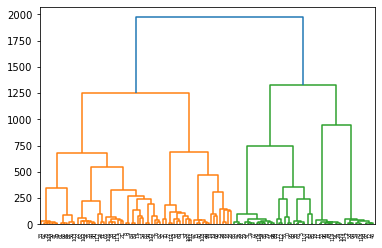

In [25]:
from scipy.cluster.hierarchy import dendrogram

dendrogram(linkage_matrix)
plt.show()

In [31]:
from scipy.cluster.hierarchy import fcluster
num_clusters = 4
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

In [32]:
cluster_df = pd.DataFrame({'cluster': clusters, 'phage': result_df.index})

In [33]:
cluster_df

,cluster,phage
0,3,c102_node_357
1,2,c102_node_469
2,5,c103_node_93
3,1,c105_node_57
4,3,c107_node_114
...,...,...
113,1,p87_node_259
114,4,p88_node_100
115,5,p88_node_114
116,3,p94_node_100


In [34]:
cluster_df.to_csv('clusters.tsv', sep='\t', index=False)